# Linear Regression using Gradient Descent and the Normal Equations to Predict the Weather in London After WW2.

Yash Patel, Noah Meininger, David DeVore, Caleb Emerson, George Rauta, Akanksh Jain

    Our goal with this project was to collect London weather data from 1935 to 1956, and, considering that WW2 took place from 1939 to 1945, see the effects that the War had on the weather in London. 

    We considered multiple factors in our linear regression as we recognized the difference between a relationship that fits the data well and a relationship that fits the trends shown by the data well. The factors we chose included longitude/

    latitude, air pollution, and population. Of these factors, our biggest interests was air pollution. WW2 had a large impact even after it ended due to its role in industrial expansion and the effects it had on the air quality (e.g: The Great Smog of London).

#### Resources

    Air-Pollution Data: https://ourworldindata.org/london-air-pollution
    
    Weather Data: https://digital.nmla.metoffice.gov.uk/index.php?name=SO_86058de1-8d55-4bc5-8305-5698d0bd7e13

    Population: https://tasks.illustrativemathematics.org/content-standards/tasks/1595

    Compiled Data on London: https://docs.google.com/spreadsheets/d/1cAUXhY3yODRw_qezb44WnIjhVe72IsirT_6N3nhgIYE/edit?                              usp=sharing

    Cross Validation@: https://www.geeksforgeeks.org/cross-validation-machine-learning/

    The Great Smog of London: https://www.britannica.com/event/Great-Smog-of-London

#### Normal Equation Model

    [latitude | longitude |  air pollution |  population] [X3 ; X4] = [T(1946-T1936) | T(1956-T1946)]

##### Gradient Descent Model

    ∇𝜙(𝐱)=2𝐉(𝐱)^(𝑇)𝐟(𝐱)

#### Our Data


In [ ]:
londonLat = 51.072;
londonLong = 0.1276;
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
airPollution1935 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
airPollution1946 = [272.73, 256.82, 240.91, 225, 209.09, 204.86, 200.62, 196.39, 192.15, 187.92, 183.68]
population1935 = [7586500, 7612600, 7638000, 7662800, 7686900, 7710600, 7733600, 7756000, 7780000, 7799300, 7820100, 7840400]
population1946 = [7840400, 7860200, 7879500, 7898300, 7916600, 7934400, 7951800, 7968700, 7985200, 8001200, 8016800]
avgMaxTemp1936_1946 = [57.675, 56.775, 57.525, 57.525, 55.275, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525]
avgMinTemp1936_1946 = [44.95, 45.05, 46.3, 45.05, 44.925, 45.05, 45.05, 45.4, 45.05, 45.05, 45.05]
avgMaxTemp1946_1956 = [57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.25, 57.25, 57.25, 66]
avgMinTemp1946_1956 = [45.05, 45.05, 45.05, 45.05, 45.05, 45.05, 45.05, 45.225, 45.225, 40.225, 54]

#### Comparing Gradient Descent and the Normal Equation


    1935:1946 - Pollution

2.5162477156132814e6
2.2486290234108036e6
2.0094808680759326e6
1.795774403452673e6
1.6048030080792757e6
1.4341480052187382e6
1.2816480297740353e6
1.1453716541131148e6
1.0235929261036254e6
914769.5095410484
817523.1501138627
730622.2195027822
652966.1165311685
583571.3278036714
521558.97128795495
466143.66507617163
416623.5803465381
372371.5525435422
332827.1381978728
297489.51678391476
265911.1477152326
237692.10214247153
212474.99776461348
189940.47250183846
169803.13970303856
151807.97365977784
135727.07964841952
121356.80759227765
108515.17278767537
97039.55102682524
86784.61892574378
77620.51337099091
69431.18677421269
62112.93730341678
55573.0954760284
49728.85047913296
44506.201351987125
39839.01974728917
35668.21240086852
31940.97270228589
28610.111887316336
25633.461381717985
22973.338726836053
20596.070322869473
18471.564945236292
16572.93263252701
14876.14411917564
13359.72649948694
12004.49126853618
10793.291295518342
9710.803651559472
8743.335541455614
7878.650881421141
710

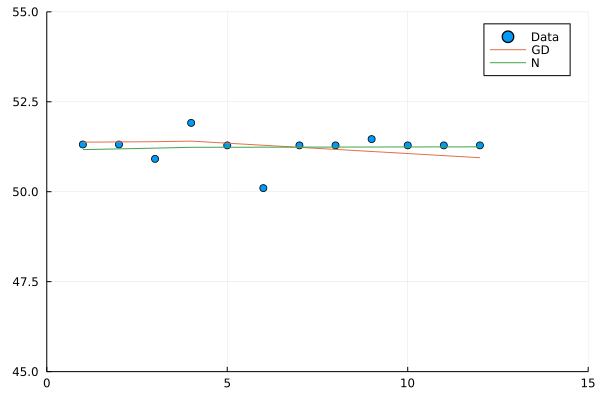

In [15]:
using FundamentalsNumericalComputation
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
airPollution1935_1946 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
avgTemp1935_1946 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]

X = [1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946; 409.09 405.45 401.82 400 384.09 368.18 352.27 336.36 320.45 304.55 288.64 272.73]
X = X'

y = avgTemp1935_1946;
result = gradientDescent(X, y, 0.0000005, false, 5000)
f(year, pollution) = result[1] * year + result[2] * pollution

resultN = X \ y;
fN(year, pollution) = resultN[1] * year + resultN[2] * pollution


scatter(y, xlims = (0, 15), ylims = (45, 55), labels="Data")
plot!(f(years1935, airPollution1935_1946), labels="GD")
plot!(fN(years1935, airPollution1935_1946), labels="N")

    1935:1946 - Population

1.7852255119549697e6
1.391214989557154e6
1.0841650768943033e6
844883.0184038093
658412.0208421954
513096.3496590811
399852.76450358407
311602.7535139889
242830.07708406332
189235.9645134388
147470.4109340392
114922.77870120686
89558.61437976905
69792.48125147553
54388.85849087068
42384.912518687095
33030.31320510038
25740.33301687408
20059.29747882115
15632.102349162933
12182.017134102456
9493.387506860858
7398.155412034283
5765.354268019788
4492.922644583956
3501.3247134735075
2728.5787058511105
2126.3826205611313
1657.0950130400606
1291.382143175085
1006.3844124841663
784.287480185989
611.2087429740186
476.3295757342289
371.219092214703
289.30715598464815
225.47370120170868
175.7286928786054
136.96272193938276
106.75264552126914
83.21012368893513
64.86358505212479
50.56624331664057
39.424415163231615
30.741658823149436
23.975241622739595
18.702215415768027
14.592979382003342
11.39067768305388
8.89514418562669
6.950390685722486
5.434856560739253
4.253810384911909
3.3334285561940513
2.

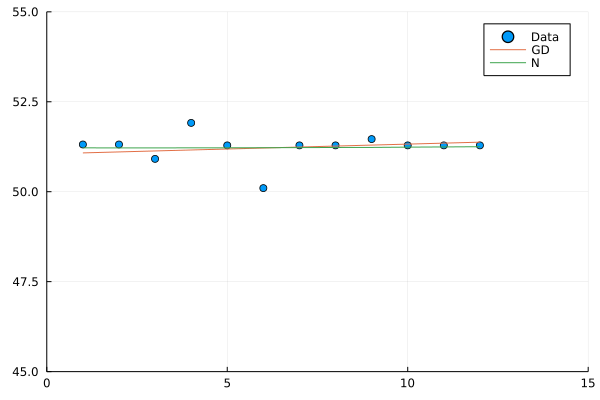

In [14]:
using FundamentalsNumericalComputation
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
population1935_1946 = [7586500, 7612600, 7638000, 7662800, 7686900, 7710600, 7733600, 7756000, 7780000, 7799300, 7820100, 7840400]
normPopulation1935_1946 = normalize(population1935_1946)
avgTemp1935_1946 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]

X = [years1935'; normPopulation1935_1946']
X = X'

y = avgTemp1935_1946;
result = gradientDescent(X, y, 0.0000005, false, 5000)
f(year, population) = result[1] * year + result[2] * population

resultN = X \ y;
fN(year, population) = resultN[1] * year + resultN[2] * population

scatter(y, xlims = (0, 15), ylims = (45, 55), labels="Data")
plot!(f(years1935, normPopulation1935_1946), labels="GD")
plot!(fN(years1935, normPopulation1935_1946), labels="N")

    1945:1956 - Pollution

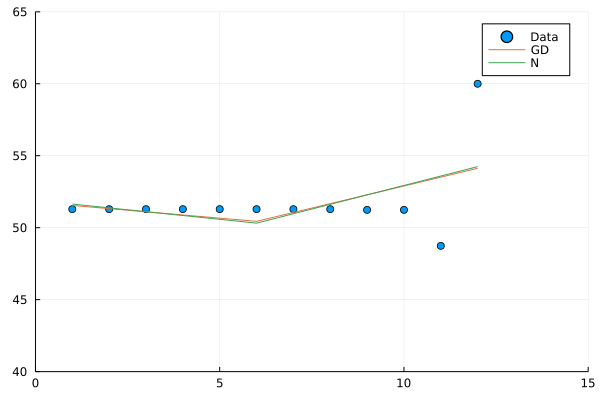

In [5]:
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        #println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

function normalizeData(v)
    return (v .- mean(v)) / std(v);
end

bias = ones(12)
year1945_1956 = [1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956];
airPollution1945_1956 = [288.64, 272.73, 256.82, 240.91, 225, 209.09, 204.86, 200.62, 196.39, 192.15, 187.92, 183.68];
avgTemp1945_1956 = [51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2375, 51.2375, 48.7375, 60];

year1945_1956 = normalizeData(year1945_1956)
airPollution1945_1956 = normalizeData(airPollution1945_1956)

X = [bias'; year1945_1956'; airPollution1945_1956'];
X = X';

y = avgTemp1945_1956;
resultGD = gradientDescent(X, y, 1, false, 50);
fGD(year, pollution) = resultGD[1] .+ resultGD[2] * year + resultGD[3] * pollution

resultN = X \ y;
fN(year, pollution) = resultN[1] .+ resultN[2] * year + resultN[3] * pollution

scatter(y, xlims = (0,15), ylims = (40,65), labels="Data")
plot!(fGD(year1945_1956, airPollution1945_1956), labels="GD")
plot!(fN(year1945_1956, airPollution1945_1956), labels="N")


    1945:1956 - Population


[1.0 1935.0 7.5865; 1.0 1936.0 7.6126; 1.0 1937.0 7.638; 1.0 1938.0 7.6628; 1.0 1939.0 7.6869; 1.0 1940.0 7.7106; 1.0 1941.0 7.7336; 1.0 1942.0 7.756; 1.0 1943.0 7.78; 1.0 1944.0 7.7993; 1.0 1945.0 7.8201; 1.0 1946.0 7.8404]


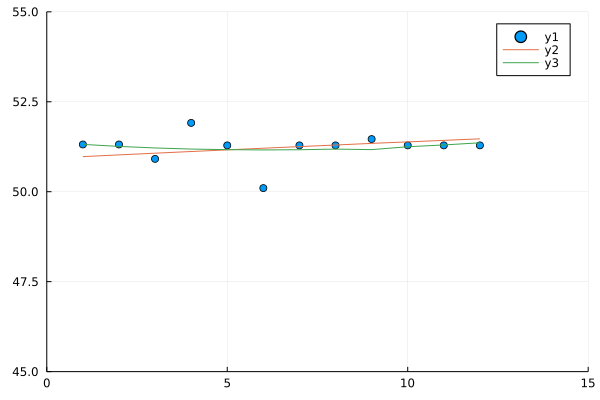

In [2]:
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        #println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

bias = ones(12)
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
population1935_1946 = [7586500/1000000, 7612600/1000000, 7638000/1000000, 7662800/1000000, 7686900/1000000, 7710600/1000000, 7733600/1000000, 7756000/1000000, 7780000/1000000, 7799300/1000000, 7820100/1000000, 7840400/1000000]
avgTemp1935_1946 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]

X = [bias'; years1935'; population1935_1946'];
X = X';

y = avgTemp1935_1946;
resultGD = gradientDescent(X, y, 0.0000005, false, 5000)
fGD(year, population) = resultGD[1] .+ resultGD[2] * year + resultGD[3] * population

resultN = X \ y;
fN(year, population) = resultN[1] .+ resultN[2] * year + resultN[3] * population

scatter(y, xlims = (0, 15), ylims = (45, 55))
plot!(fGD(years1935, population1935_1946))
plot!(fN(years1935, population1935_1946))

Error Analysis

    Flop Count Analysis

    Gradient Descent
    1. Compute X * Theta -> (n x d)(d x 1) ~ 2nd - n
    2. Compute alpha / m * X' ~ nd + 1
    3. Compute X * Theta - y ~ n
    4. Compute (alpha / m * X') * (X * Theta - y) -> (d x n)(n x 1) ~ 2nd - d
    5. Compute Theta - (alpha / m * X') * (X * Theta - y) ~ d
    6. Repeat the process for k interations

    Together there are approximately 5knd + k flops.

    Clearly the knd term dominates and so all together, 
    Gradient Descent will be ~O(knd).


    Normal Equations
    1. Compute X'X -> (d x n)(n x d) ~ 2(n-1)d^2
    2. Compute X'y -> (d x n)(n x 1) ~ 2(n-1)d
    3. Solve system X'X * theta = X'y using Cholskey ~ O(1/3 * d^3)

    Together there are approximately 2(n-1)d^2 + 2(n-1)d + O(1/3 * d^3) flops.

    since usually n >> d, 2(n-1)d^2 term dominates and so all together, 
    So Normal Equations are ~O(nd^2).

    Scaling Analysis

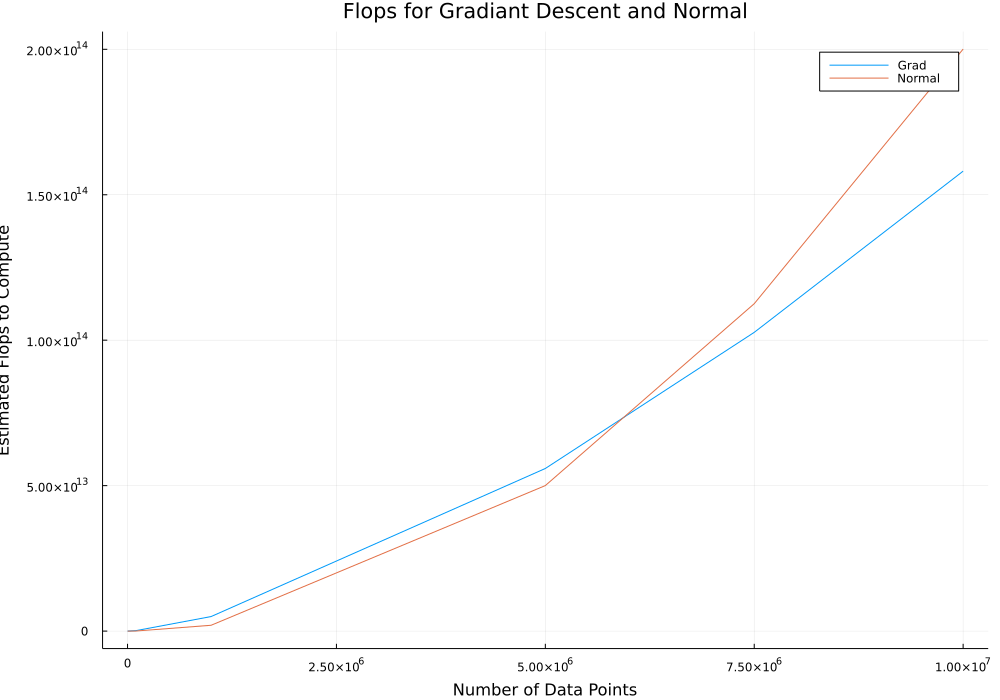

In [1]:
using Plots

vals = [1000, 10000, 100000, 1000000, 5000000, 7500000, 10000000]
k = 1000

gradTime = []
normTime = []
for n in vals
  d = sqrt(n)
  push!(gradTime, (5 * k * n * d + k))
  push!(normTime, (2*(n-1)*d^2 + 2*(n-1)*d + 1/3 * d^3))

end
plot(vals, gradTime, labels= "Grad", title = "Flops for Gradiant Descent and Normal", xlabel = "Number of Data Points", ylabel = "Estimated Flops to Compute")
plot!(vals, labels= "Normal", normTime)
plot!(size=(1000,700))

    Gradient Descent Error Analysis

2.492576762057955e6
2.223706072876923e6
1.983845690873979e6
1.7698654790422951e6
1.5789730340825496e6
1.4086772458071522e6
1.2567557883907447e6
1.121226119230913e6
1.0003196069570042e6
892458.4509600594
796235.091245918
710393.8399120583
633814.4945407021
565497.719664526
504552.00553451525
450182.03400311916
401678.2996986055
358407.8510479227
319806.03031931265
285369.1048930172
254647.69359886405
227240.90233507007
202791.0924386474
180979.21353514612
161520.63996186914
144161.4564302825
128675.14445586906
114859.62631365187
102534.62794329235
91539.32638992455
81730.25108005443
72979.41154437544
65172.627154462454
58208.03707656763
51994.77099755771
46451.76327609336
41506.69504383732
37095.05045121302
33159.27474181103
29648.023168395386
26515.490948935
23720.815518650976
21227.54327752572
19003.15387438036
17018.635819472947
15248.107887402448
13668.48136966278
12259.158769274922
11001.765005490928
9879.90762081701
8878.962861080163
7985.88483690377
7189.035276167674
6478.0316457

Excessive output truncated after 524306 bytes.

1.1414345466177451
1.139267753787101
1.1371059943454598
1.1349492566004291
1.1327975288867704
1.1306507995663373
1.1285090570280336
1.1263722896877233
1.1242404859881838
1.122113634399041
1.1199917234167074
1.1178747415643073
1.1157626773916374
1.1136555194750855
1.111553256417583
1.109455876848529
1.1073633694237397
1.105275722825383
1.1031929257619217
1.1011149669680373
1.0990418352045925
1.0969735192585535
1.0949100079429308
1.0928512900967242
1.090797354584863
1.088748190298141
1.0867037861531612
1.0846641310922627
1.0826292140834815
1.0805990241204737
1.0785735502224747
1.0765527814342102
1.0745367068258718
1.0725253154930308
1.0705185965565853
1.0685165391627136
1.0665191324828127
1.0645263657134105
1.062538228076162
1.0605547088177354
1.0585757972097876
1.0566014825489016
1.0546317541565167
1.052666601378879
1.0507060135869892
1.0487499801765299
1.0467984905678234
1.0448515342057698
1.042909100559778
1.0409711791237362
1.0390377594159175
1.037108830978962
1.0351843833797894
1.03

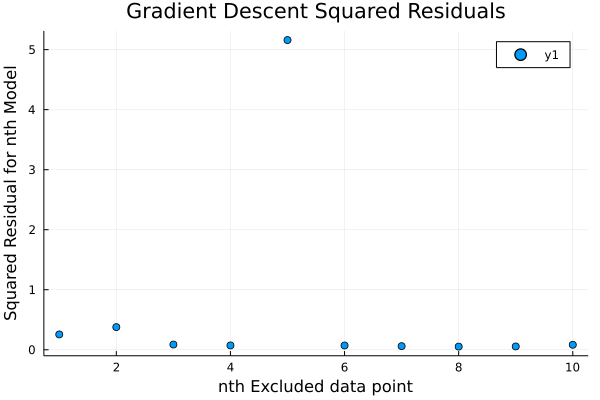

In [28]:
function gradientDescent(x, y, α, fitted, numberOfIterations)
  m = length(y)
  if fitted
      C = ones(m, 1)    
      x = hcat(C,x)
  else
      x
  end

  n = size(x)[2]
  θ = ones(n)

  for i in range(1, stop=numberOfIterations)
      pred = x * θ
      println(cost(x, y, θ))
      θ = θ - ((α/m) * x') * (pred - y)
  end
  return θ

end

function cost(x, y, θ)
  m = size(x)[1]
  loss = x * θ - y
  return (1/2length(y)) * loss' * loss
end

function crossValidation(X, Y)
    gradientResiduals = []
    alpha = 0.0000005
    numberOfIterations = 5000
    for i in 1:10
      trainingSetX = vcat(X[1:i - 1, :], X[i + 1:end, :])
      trainingSetY = vcat(Y[1:i - 1], Y[i + 1:end])
      
      gradientCoeffs = gradientDescent(trainingSetX, trainingSetY, alpha, false, numberOfIterations)
      yHatGradient = predict(gradientCoeffs, X[i,:])
      push!(gradientResiduals, (yHatGradient-Y[i])^2)
    end
    
    x=1:10
    scatter(x, gradientResiduals, title = "Gradient Descent Squared Residuals", xlabel = "nth Excluded data point", ylabel = "Squared Residual for nth Model")
  end

  function predict(coeffs, x)
    return y=coeffs[1]*x[1] + coeffs[2]*x[2] 
  end

  years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
  airPollution1935 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
  avgMaxTemp1936 = [57.675, 56.775, 57.525, 57.525, 55.275, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525]

  X = [1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946; 409.09 405.45 401.82 400 384.09 368.18 352.27 336.36 320.45 304.55 288.64 272.73]
  X = X'
  y = avgMaxTemp1936;

  crossValidation(X, y)

Application to Our Overall Problem

    We noticed that Gradient Descent was very valuable for, however obviously, re-adjusting when there are large deviances in the data.

    Furthermore, we noticed that air pollution was a better predictor before WW2, and population was a better predictor after WW2. This says a lot more about air pollution than it does for population. More
    
    specifically, this shows how much London's recovery from WW2 affected the air quality. 

Gradient-Descent vs. The Normal Equation

    The Normal Equation provided us with a 4x2 matrix, each row provides us with two coefficients that we can use to plot our linear regression. The plot that we did show was the only prediction that was remotely closs.

    Gradient-Descent, on the other hand, provided us with four accurate predictions corresponding to the relationsip between pollution and population and the weather in each of the two time frames (reference plots above). 

    Considering that the normal equation has a higher flop count when you scale the problem as well as less accuracy and more error, it is much less valuable for linear regression. Gradient-Descent should be preffered over the normal equation, especially when you begin to exceed 7.5x10^6 data points.